# Document principal du projet

## 1- Création de la base de données


On se sert directement du fichier *src/services/init/initialisation.json*. Ce fichier contient une liste de codes-barres que l'on utilise pour instancier la base de données *src/database/barcodes.json*.

On doit d'abord s'assurer d'être au bon endroit et d'avoir le bon *working directory*, à savoir : *Projet-python-pour-la-data-science---ENSAE-Paris*.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def set_working_directory(target_dir_name):
    current_dir = os.getcwd()
    
    while os.path.basename(current_dir) != target_dir_name:
        parent_dir = os.path.dirname(current_dir)
        # Si on atteint la racine sans trouver le dossier cible, on arrête pour éviter une boucle infinie
        if current_dir == parent_dir:  
            raise FileNotFoundError(f"Le dossier cible '{target_dir_name}' n'a pas été trouvé dans l'arborescence.")
        current_dir = parent_dir  # Remonter d'un niveau

    os.chdir(current_dir)
    print(f"Le working directory est maintenant :\n {os.getcwd()}")

# Exemple d'utilisation
try:
    set_working_directory("Projet-python-pour-la-data-science---ENSAE-Paris")
except FileNotFoundError as e:
    print(e)


Le working directory est maintenant :
 c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris


On importe ensuite la class **Barcodes** afin de récupérer la BDD sous forme de *DataFrame*. Si celle-ci n'existe pas déjà, elle est initialisée avec des barcodes stockés dans *'src/service/init/initialisation.json'*. 

In [3]:
from src.services.barcodes import Barcodes

bar = Barcodes()
print(bar.df.columns)

Fichier .env chargé avec succès.
Index(['Nom', 'Categorie', 'Nutriscore', 'Novascore', 'Ecoscore',
       'Taux de sel (100g)', 'Taux de matieres grasses (100g)',
       'Taux de matieres grasses saturees (100g)', 'Taux de proteine (100g)',
       'Taux de sucre (100g)', 'Energie (Kcal) (100g)'],
      dtype='object')


Une fois que cela a été fait, on peut désormais créer une nouvelle catégorie, appelée **categorie_clean**, celle-ci permet de regrouter différents produits qui ont des caractéristiques communes. Ensuite, on peut afficher un aperçu de la base de données (BDD).

In [4]:
from src.services.traitement import Traitement
# Création d'une instance
# print(Barcodes().df)
traitement = Traitement()

# On récupère de DataFrame
data = traitement.df

# Affichage des données transformées
print(f"Nom des colonnes :\n{[name for name in data.columns]}")
print('-'*60 + '\n')
print("Les 2 premières lignes de la BDD")
print(data.head(2))

Nom des colonnes :
['Nom', 'Nutriscore', 'Ecoscore', 'Taux de sel (100g)', 'Taux de matieres grasses (100g)', 'Taux de matieres grasses saturees (100g)', 'Taux de proteine (100g)', 'Taux de sucre (100g)', 'Energie (Kcal) (100g)', 'Categorie_clean']
------------------------------------------------------------

Les 2 premières lignes de la BDD
                                   Nom Nutriscore  Ecoscore  \
Barcode                                                       
3073781055016        Fagotin tradition          d      47.0   
3564707128117  Ricotta bio 8% Mat. Gr.          c      60.0   

               Taux de sel (100g)  Taux de matieres grasses (100g)  \
Barcode                                                              
3073781055016                 1.4                             28.0   
3564707128117                 0.4                              8.0   

               Taux de matieres grasses saturees (100g)  \
Barcode                                                   
3073

On peut également vérifier que les variables sont du bon type.

In [5]:
print(data.dtypes)

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


## 2- Statistiques sur la BDD

Nous allons dans cette partie nous occuper de réaliser des statistiques sur la BDD afin de mieux comprendes la répartition des différentes variables et leurs interactions. Cela pourra alors motiver l'uilisation de modèle prédictif dans la section qui suit.

Commençons par importer la classe qui nous permettra de réaliser toutes les statistiques :

In [6]:
from src.services.stats import Statistiques
stats = Statistiques()
data = Statistiques().df

### a) Statistiques descriptives univariées

On peut commencer par s'intéresser aux moyennes et aux écarts-types de chaque colonne si elles sont numériques ou alors à leur histogramme sinon.

In [7]:
data.describe()

,Ecoscore,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g)
count,389.000000,417.000000,433.000000,429.000000,435.000000,431.000000,423.000000
mean,50.897172,0.822739,18.298237,5.585112,7.423319,14.730643,318.590613
std,27.099848,1.497164,24.020204,8.038225,7.320537,20.562502,217.016591
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.030000,1.600000,0.400000,0.950000,0.700000,148.500000
50%,50.000000,0.420000,8.200000,2.400000,5.800000,3.900000,295.000000
75%,72.000000,1.100000,24.000000,7.700000,11.100000,25.000000,438.000000
max,114.000000,17.100000,100.000000,84.000000,39.200000,100.000000,900.000000


On peut ensuite regarder la moyenne dans chaque groupe de '*Categorie_clean*'

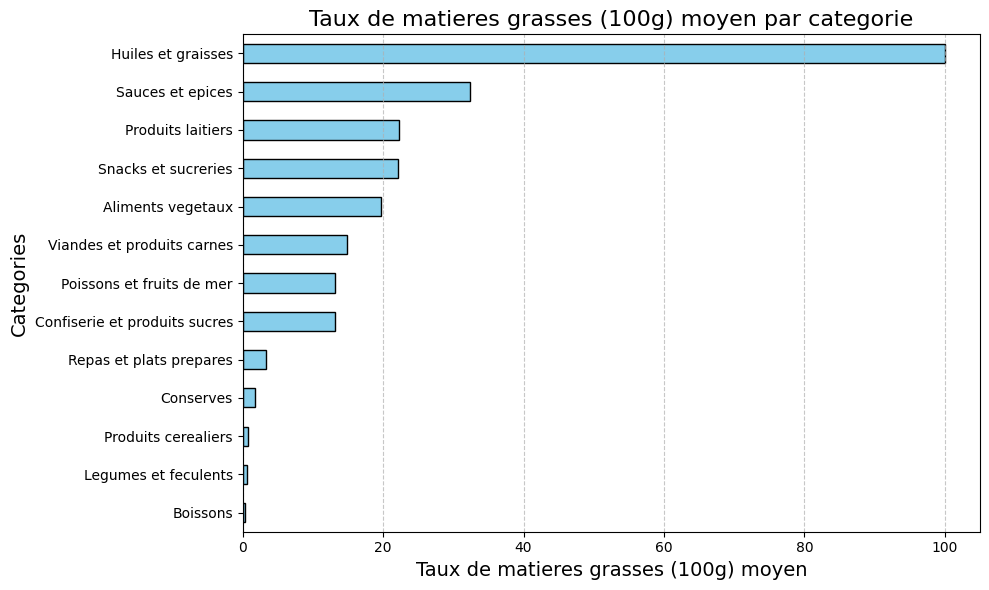

In [8]:
stats.moy_par_categorie('Taux de matieres grasses (100g)')

On s'intéresse ensuite aux données en elles-mêmes : est-ce qu'il y a beaucoup de *NA* ou non ?

In [9]:
na_par_variable = data.apply(lambda x: x.isna().sum()).sort_values(ascending=False)
print(na_par_variable)
print('-'*60)
print(f"Nombre total d'obsevations {len(data)}")

Ecoscore                                    78
Taux de sel (100g)                          50
Energie (Kcal) (100g)                       44
Taux de matieres grasses saturees (100g)    38
Taux de sucre (100g)                        36
Taux de matieres grasses (100g)             34
Taux de proteine (100g)                     32
Categorie_clean                              5
Nom                                          4
Nutriscore                                   0
dtype: int64
------------------------------------------------------------
Nombre total d'obsevations 467


Il manque beaucoup d'Ecoscores notamment.

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=filtered_df[variable], palette="Set3")


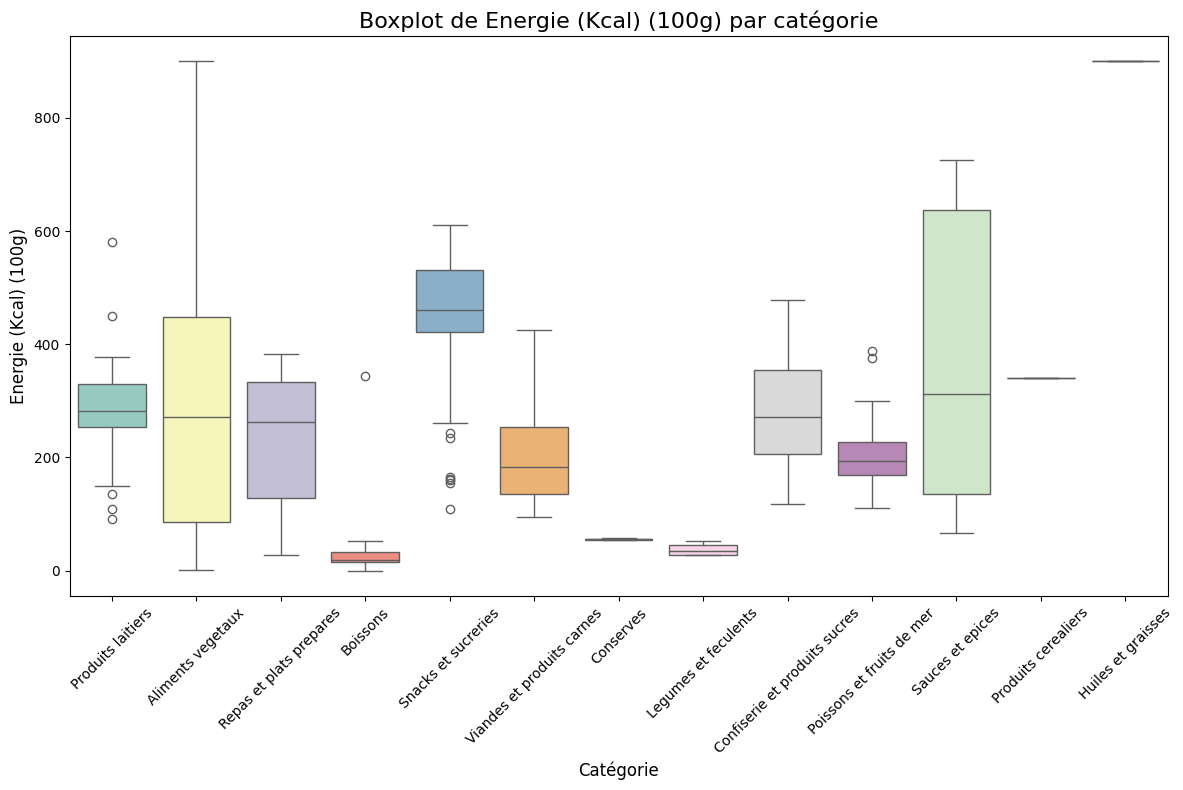

In [10]:
stats.boxplot_categorie("Energie (Kcal) (100g)")

Cela explique le fait qu'il y ait des boxplots plats. On peut donc réappliquer la méthode avec cette fois-ci l'atribut *'few_obs'* qui nous permet de rentrer le nombre minimal d'observations à avoir dans une catégorie pour réaliser le boxplot.

On ne va garder que les catégories qui contiennent au moins 5 observations.

c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\stats.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=filtered_df['Categorie_clean'], y=filtered_df[variable], palette="Set3")


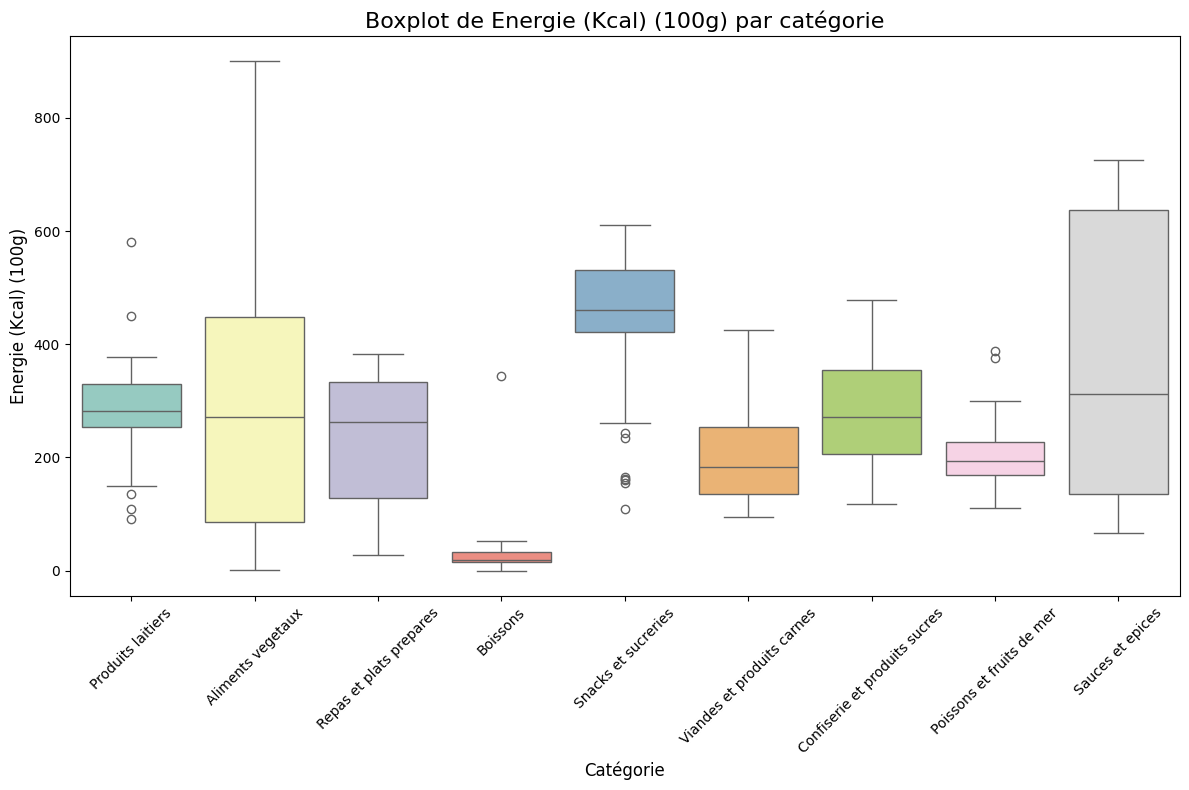

In [11]:
stats.boxplot_categorie("Energie (Kcal) (100g)", 5)

Qu'en est-il pour les données catégorielles ?

Nom                                          object
Nutriscore                                   object
Ecoscore                                    float64
Taux de sel (100g)                          float64
Taux de matieres grasses (100g)             float64
Taux de matieres grasses saturees (100g)    float64
Taux de proteine (100g)                     float64
Taux de sucre (100g)                        float64
Energie (Kcal) (100g)                       float64
Categorie_clean                              object
dtype: object


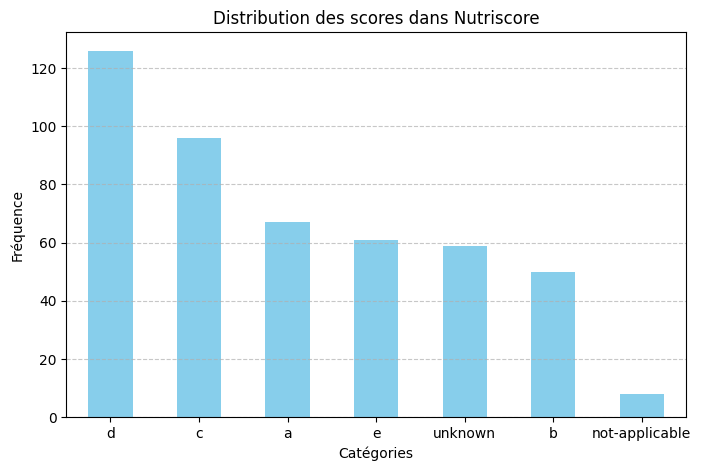

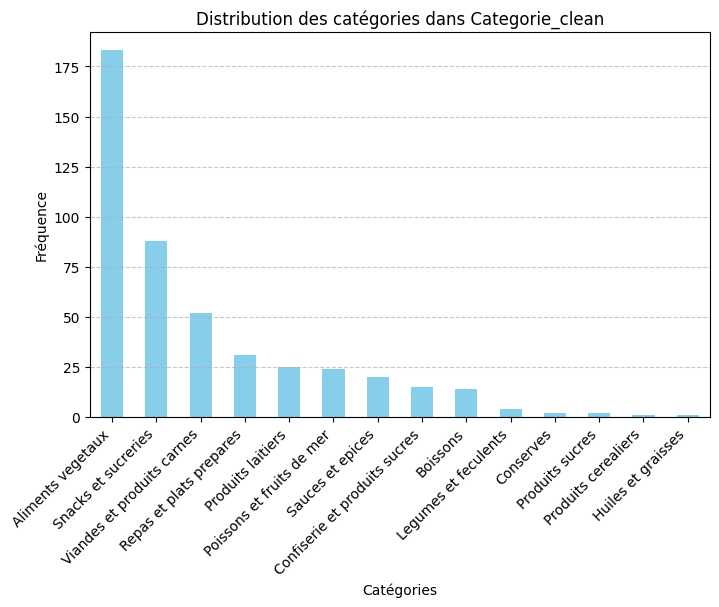

In [12]:
print(data.dtypes)
# Compter les occurrences de chaque catégorie
counts_nutriscore = data['Nutriscore'].value_counts()
counts_Categorie_clean = data['Categorie_clean'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_nutriscore.plot(kind='bar', color='skyblue')
plt.title('Distribution des scores dans Nutriscore')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Créer un graphique en barres
plt.figure(figsize=(8, 5))
counts_Categorie_clean.plot(kind='bar', color='skyblue')
plt.title('Distribution des catégories dans Categorie_clean')
plt.xlabel('Catégories')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### b) Statistiques descriptives multivariées

On souhaite désormais s'intéresser à la covariance entre les variables deux à deux. On peut pour ce faire regarder la matrice des covariances.

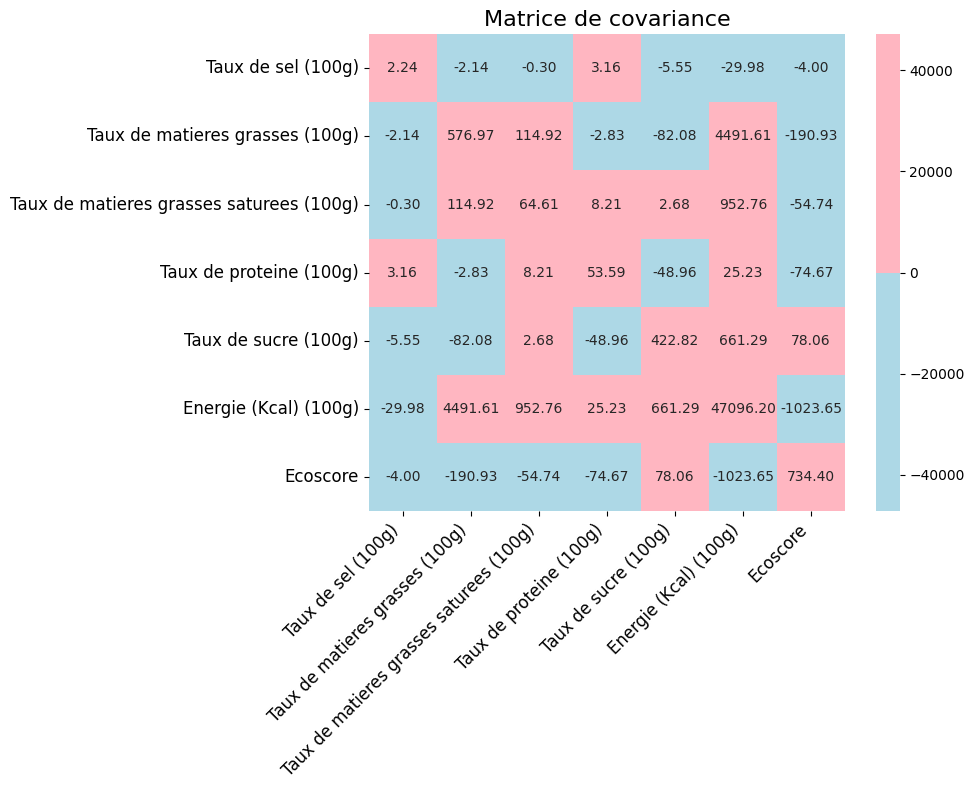

,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g),Ecoscore
Taux de sel (100g),2.241499,-2.140761,-0.301794,3.164748,-5.545504,-29.981275,-4.004454
Taux de matieres grasses (100g),-2.140761,576.970185,114.921887,-2.833159,-82.076594,4491.607759,-190.932500
Taux de matieres grasses saturees (100g),-0.301794,114.921887,64.613058,8.212272,2.681782,952.760563,-54.743951
Taux de proteine (100g),3.164748,-2.833159,8.212272,53.590264,-48.957460,25.231659,-74.670683
Taux de sucre (100g),-5.545504,-82.076594,2.681782,-48.957460,422.816494,661.293700,78.058209
Energie (Kcal) (100g),-29.981275,4491.607759,952.760563,25.231659,661.293700,47096.200601,-1023.646441
Ecoscore,-4.004454,-190.932500,-54.743951,-74.670683,78.058209,-1023.646441,734.401770


In [13]:
stats.stats_covariances()


TODO -> commenter

## 3- Mise à jour BDD

Cette section se place ici afin de ne pas modifier les statistiques descriptives faites ci-dessus. Les statistiques précédentes ont été calculées sur les données qui ont servi à initialiser la base de données. Pour que l'interprétation en lien avec chaque graphique reste cohérente, il faut évidemment que les données soient les mêmes à chaque fois. Nous pourrions refaire la totalité du travail à chaque fois que l'on met à jour la BDD mais cela n'aurait pas trop de sens dans le contexte de ce projet.

Nous souhaitions tout de même inclure l'option de mettre à jour la base de données. En effet, nous pouvons chercher un code barre dans la base de données, si celui-ci n'est pas déjà présent, alors nous faisons une requête API pour l'ajouter à la BDD.

### a) Navigation dans la BDD

Commençons par rechercher un barcode qui appartient déjà à la BDD. On n'a ainsi pas besoin de requêter l'API car on peut directement requêter la BDD.

In [14]:
bar = Barcodes()
data = bar.df
barcode = '3229820789118'
print(bar.get_produit(barcode))



L'url associée au barcode est : https://world.openfoodfacts.org/api/v0/product/3229820789118.json
Ce produit associé au code barre 3229820789118                   vient d'être ajouté à la BDD
Nom                                                                      Lunettes fraise
Categorie                                                        fr:lunettes-a-la-fraise
Nutriscore                                                                             d
Novascore                                   en:4-ultra-processed-food-and-drink-products
Ecoscore                                                                            83.0
Taux de sel (100g)                                                                   0.1
Taux de matieres grasses (100g)                                                     15.0
Taux de matieres grasses saturees (100g)                                             4.6
Taux de proteine (100g)                                                              6.0
Taux de

### b) Suppression de données

Supprimons le code-barre que l'on vient de chercher.

In [15]:
# bar.delete_produit(barcode)
print(f"Nombre d'observation avant la suppression : {len(data)}")
bar.delete_produit(barcode)
print(f"Nombre d'observation après la suppression : {len(data)}")

Nombre d'observation avant la suppression : 468
Suppression de 3229820789118 confirmée.
Nombre d'observation après la suppression : 467


### c) Ajout de nouvelles données

Ré-ajoutons maintenant la donnée que l'on vient de supprimer.

In [16]:
# bar.delete_produit(barcode)
print(f"Nombre d'observation avant l'ajout : {len(data)}")
bar.get_produit(barcode)
print(f"Nombre d'observation après l'ajout : {len(data)}")

Nombre d'observation avant l'ajout : 467
L'url associée au barcode est : https://world.openfoodfacts.org/api/v0/product/3229820789118.json
Ce produit associé au code barre 3229820789118                   vient d'être ajouté à la BDD
Nombre d'observation après l'ajout : 468


### d) suppression de la BDD

Le code suivant est commenté pour éviter que vous supprimiez la base de données en faisant tourner le code. Vous pouvez le décommenter pour vérifier que cela supprimer bien la base de données.

In [17]:
# bar.vider_database()
# print(bar.df)
# print(bar.df.empty)

## 4- Modèle prédictifs

### a) Modèle 1

In [28]:
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

On peut faire une régression logistique car (???). Commençons par rappeler les variables dont nous disposons :

On crée une instance et on applique le modèle de régression logistique.

In [29]:
# Assurez-vous que le fichier 'Traitement' et le DataFrame 'df' sont bien chargés
from src.services.traitement import Traitement
from src.services.prediction_rl import LogisticRegressionPrediction

# Chargement du DataFrame
df = Traitement().df

# Vérification que le DataFrame n'est pas vide
if df.empty:
    raise ValueError("Le DataFrame est vide, veuillez vérifier le chargement des données.")

# Création de l'objet de prédiction pour la régression logistique
log_pred = LogisticRegressionPrediction()

# Entraînement du modèle
log_pred.train_model()

# Évaluation des performances
log_pred.evaluate_performance()

# Affichage des coefficients
log_pred.get_model_details()


Matrice de confusion :
 [[10  1  2  0  0  0  0]
 [ 6  1  2  1  0  0  0]
 [ 2  1  9  4  1  0  2]
 [ 0  0  4 17  2  0  3]
 [ 1  0  1  3  7  0  0]
 [ 1  0  1  0  0  0  0]
 [ 6  0  2  4  0  0  0]]
------------------------------------------------------------
Rapport de classification
              precision    recall  f1-score   support

           0       0.38      0.77      0.51        13
           1       0.33      0.10      0.15        10
           2       0.43      0.47      0.45        19
           3       0.59      0.65      0.62        26
           4       0.70      0.58      0.64        12
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        12

    accuracy                           0.47        94
   macro avg       0.35      0.37      0.34        94
weighted avg       0.43      0.47      0.43        94

------------------------------------------------------------
Précision : 46.81%
Coefficients :
 [[ 0.25652518 -2.28717182 -

Évaluation des performances du modèle.

Affichage des coefficients du modèle.

Affichage des probabilités prédites. (A voir si on laisse).

### b) Modèle 2

In [19]:
# Assurez-vous que le fichier 'Traitement' et le DataFrame 'df' sont bien chargés
from src.services.traitement import Traitement
from src.services.prediction_rf import RandomForestPrediction

# Chargement du DataFrame
df = Traitement().df

# Vérification que le DataFrame n'est pas vide
if df.empty:
    raise ValueError("Le DataFrame est vide, veuillez vérifier le chargement des données.")

# Création de l'objet de prédiction pour la Random Forest
rf_pred = RandomForestPrediction()

# Entraînement du modèle
rf_pred.train_model(n_estimators=200, max_depth=10)  # Personnalisez les hyperparamètres si nécessaire

# Évaluation des performances
rf_pred.evaluate_performance()

# Affichage des importances des caractéristiques
rf_pred.get_model_details()


c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\prediction.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modele.ffill(inplace=True)
c:\Users\trema\OneDrive\Bureau\ENSAE Paris\Cours\S1\4. Python pour la data science\Projet-python-pour-la-data-science---ENSAE-Paris\src\services\prediction.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modele['Nutriscore'] = label_encoder.fit_transform(df_modele['Nutriscore'])


Matrice de confusion :
 [[10  2  0  0  0  0  1]
 [ 0  4  4  1  0  1  0]
 [ 2  3  9  4  1  0  0]
 [ 0  1  3 20  1  0  1]
 [ 1  0  1  4  6  0  0]
 [ 0  1  0  0  0  0  1]
 [ 4  1  1  2  0  0  4]]
------------------------------------------------------------
Rapport de classification
              precision    recall  f1-score   support

           0       0.59      0.77      0.67        13
           1       0.33      0.40      0.36        10
           2       0.50      0.47      0.49        19
           3       0.65      0.77      0.70        26
           4       0.75      0.50      0.60        12
           5       0.00      0.00      0.00         2
           6       0.57      0.33      0.42        12

    accuracy                           0.56        94
   macro avg       0.48      0.46      0.46        94
weighted avg       0.57      0.56      0.55        94

------------------------------------------------------------
Précision : 56.38%
Importances des caractéristiques :
 [0.1230

In [20]:
Traitement().df.describe()

,Ecoscore,Taux de sel (100g),Taux de matieres grasses (100g),Taux de matieres grasses saturees (100g),Taux de proteine (100g),Taux de sucre (100g),Energie (Kcal) (100g)
count,390.000000,418.000000,434.000000,430.000000,436.000000,432.000000,424.000000
mean,50.979487,0.821010,18.290637,5.582821,7.420054,14.772933,318.867522
std,27.113768,1.495785,23.992973,8.028991,7.312436,20.557434,216.834900
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.030000,1.600000,0.425000,0.975000,0.700000,148.750000
50%,50.000000,0.420000,8.300000,2.400000,5.850000,3.900000,296.000000
75%,72.000000,1.100000,24.000000,7.687500,11.100000,25.000000,437.000000
max,114.000000,17.100000,100.000000,84.000000,39.200000,100.000000,900.000000
